# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
# Fixing random state for reproducibility
np.random.seed(2360873)
N = 100

In [59]:
df = pd.read_csv("../resources/previsao_de_renda.csv").drop('Unnamed: 0', axis=1)
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

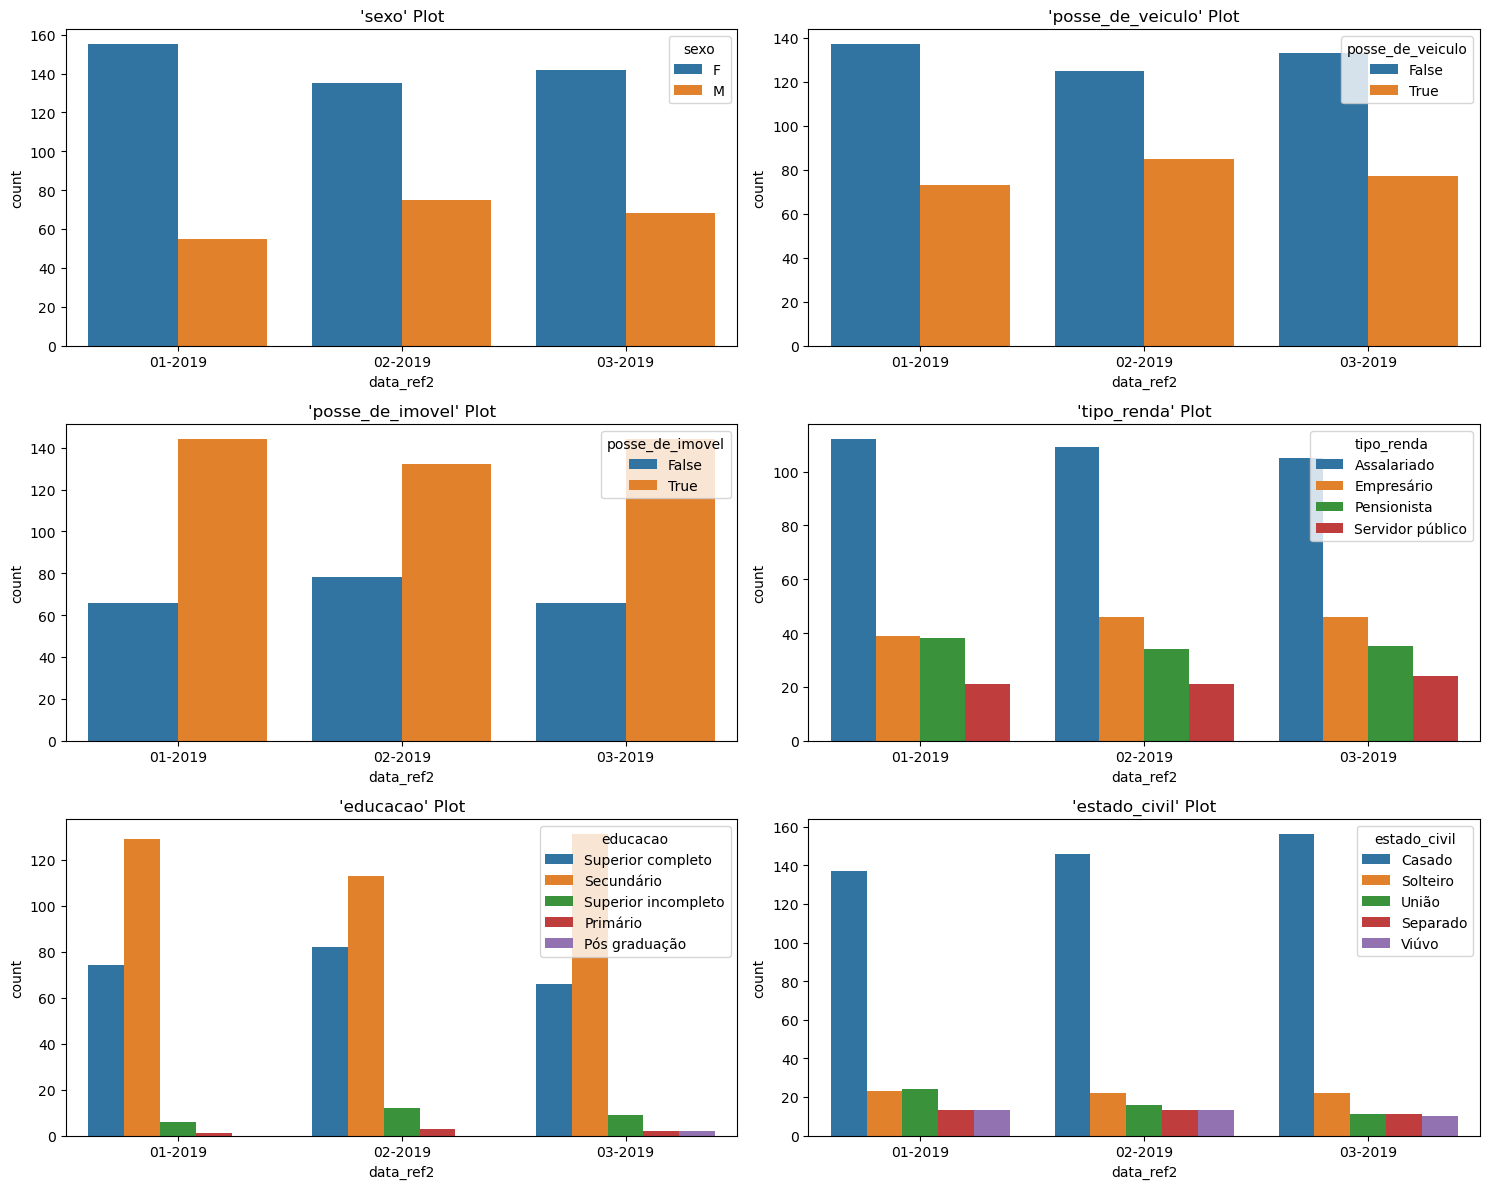

Não parece haver qualquer mudança significativa para nenhuma das varíaveis ao longo do tempo mensurado.


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a grid of subplots (2 rows, 2 columns in this case)
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# graph 1
ax1 = sns.countplot(data=df2, x="data_ref2", hue = 'sexo', ax=axes[0, 0])
axes[0, 0].set_title("'sexo' Plot")

# graph 2
ax2 = sns.countplot(data=df2, x="data_ref2", hue = 'posse_de_veiculo', ax=axes[0, 1])
axes[0, 1].set_title("'posse_de_veiculo' Plot")

# graph 3
ax3 = sns.countplot(data=df2, x="data_ref2", hue = 'posse_de_imovel', ax=axes[1, 0])
axes[1, 0].set_title("'posse_de_imovel' Plot")

# graph 4
ax4 = sns.countplot(data=df2, x="data_ref2", hue = 'tipo_renda', ax=axes[1, 1])
axes[1, 1].set_title("'tipo_renda' Plot")

# graph 5
ax5 = sns.countplot(data=df2, x="data_ref2", hue = 'educacao', ax=axes[2, 0])
axes[2, 0].set_title("'educacao' Plot")

# graph 6
ax6 = sns.countplot(data=df2, x="data_ref2", hue = 'estado_civil', ax=axes[2, 1])
axes[2, 1].set_title("'estado_civil' Plot")

# Apply label formatting to graphs that have 'data_ref2' as x-axis
for ax in axes.flatten():  # Flatten the axes array to iterate over individual axes
    if 'data_ref2' in ax.get_xlabel():  # Ensure we're applying formatting only to relevant plots
        # Generate tick labels for each axis
        tick_labs = df2['data_ref2'].map(lambda ts: ts.strftime("%m-%Y")).unique()
        ticks = ax.set_xticks(list(range(len(tick_labs))))  # Use len(tick_labs) for xticks
        ax.set_xticklabels(tick_labs, rotation=0)

# Adjust the layout
plt.tight_layout()
plt.show()

print("Não parece haver qualquer mudança significativa para nenhuma das varíaveis ao longo do tempo mensurado.")

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [66]:
tab = pd.crosstab(df2['data_ref2'],df2['sexo'])
tab.div(tab.sum(axis = 1), axis = 0)

sexo,F,M
data_ref2,,
2019-01-01,0.738095,0.261905
2019-02-01,0.642857,0.357143
2019-03-01,0.676190,0.323810


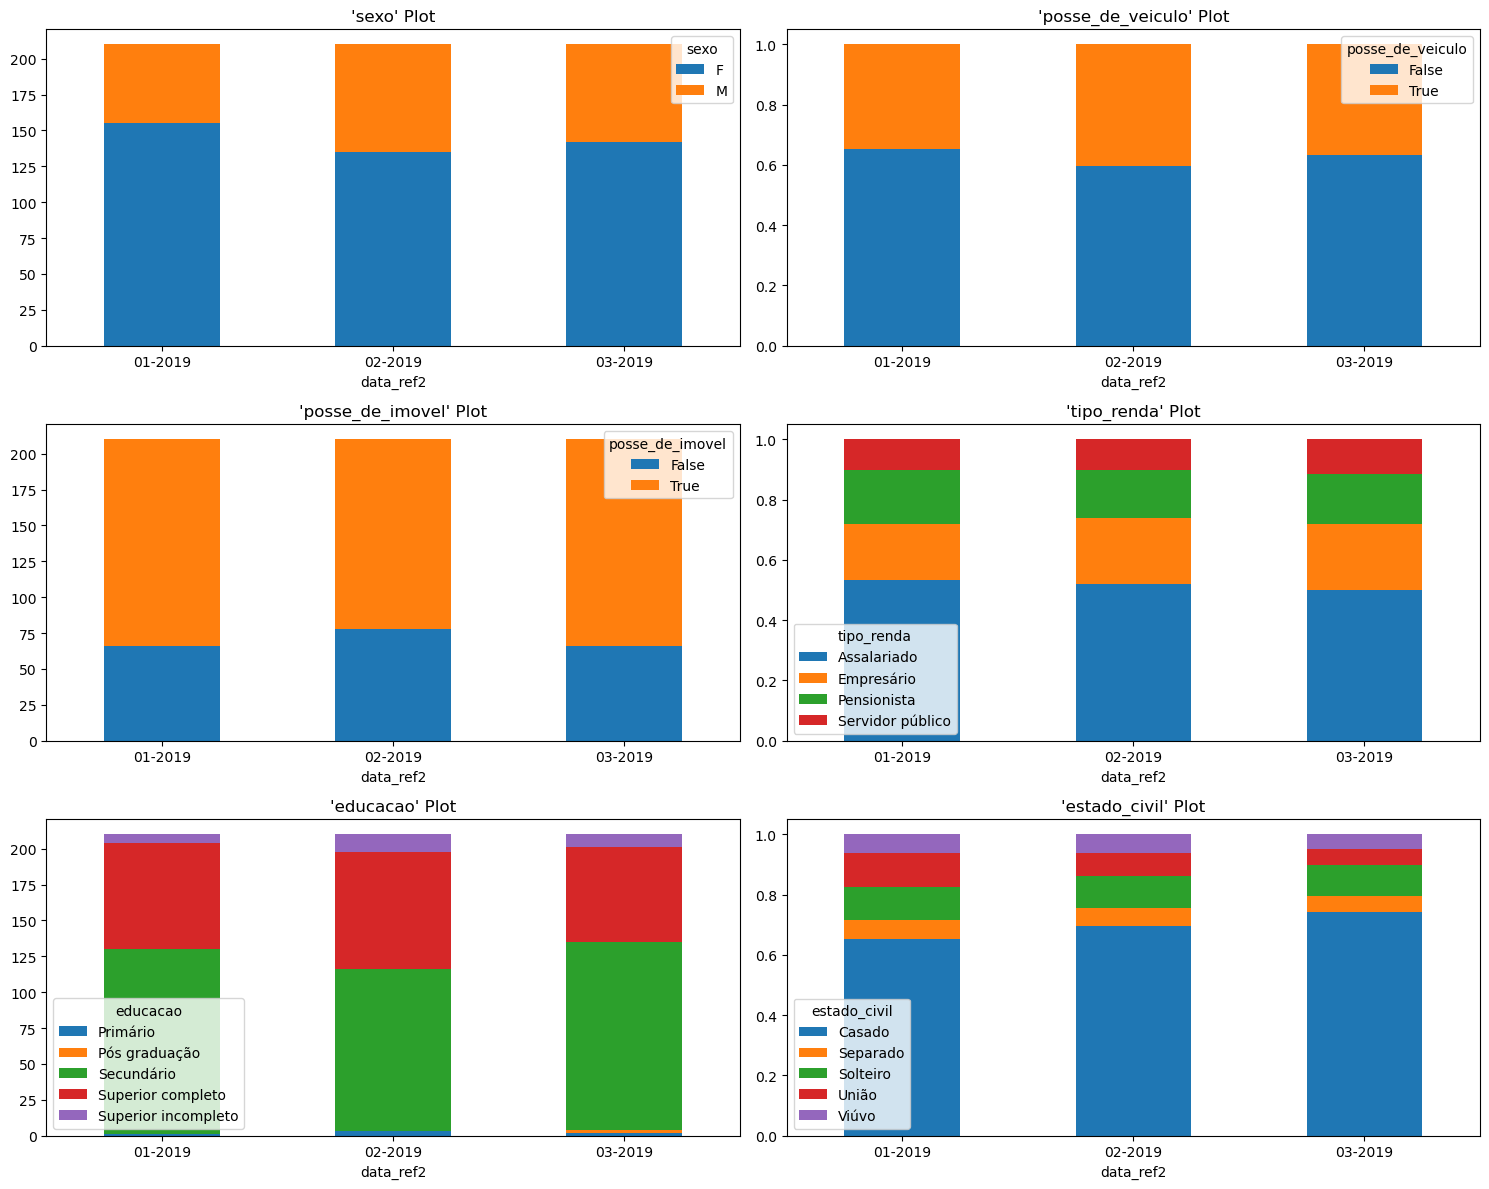

Novamente, não parece haver qualquer mudança significativa para nenhuma das varíaveis ao longo do tempo mensurado, o que indica que esses dados não serão uteis para uma modelagem.


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a grid of subplots (2 rows, 2 columns in this case)
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# graph 1
tab_freq = pd.crosstab(df2['data_ref2'],df2['sexo'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)

ax1 = tab.plot.bar(stacked = True, ax=axes[0, 0])
axes[0, 0].set_title("'sexo' Plot")

# graph 2
tab_freq = pd.crosstab(df2['data_ref2'],df2['posse_de_veiculo'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)

ax2 = tab.plot.bar(stacked = True, ax=axes[0, 1])
axes[0, 1].set_title("'posse_de_veiculo' Plot")

# graph 3
tab_freq = pd.crosstab(df2['data_ref2'],df2['posse_de_imovel'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)

ax3 = tab.plot.bar(stacked = True, ax=axes[1, 0])
axes[1, 0].set_title("'posse_de_imovel' Plot")

# graph 4
tab_freq = pd.crosstab(df2['data_ref2'],df2['tipo_renda'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)

ax4 = tab.plot.bar(stacked = True, ax=axes[1, 1])
axes[1, 1].set_title("'tipo_renda' Plot")

# graph 5
tab_freq = pd.crosstab(df2['data_ref2'],df2['educacao'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)

ax5 = tab.plot.bar(stacked = True, ax=axes[2, 0])
axes[2, 0].set_title("'educacao' Plot")

# graph 6
tab_freq = pd.crosstab(df2['data_ref2'],df2['estado_civil'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)

ax6 = tab.plot.bar(stacked = True, ax=axes[2, 1])
axes[2, 1].set_title("'estado_civil' Plot")

# Apply label formatting to graphs that have 'data_ref2' as x-axis
for ax in axes.flatten():  # Flatten the axes array to iterate over individual axes
    if 'data_ref2' in ax.get_xlabel():  # Ensure we're applying formatting only to relevant plots
        # Generate tick labels for each axis
        tick_labs = df2['data_ref2'].map(lambda ts: ts.strftime("%m-%Y")).unique()
        ticks = ax.set_xticks(list(range(len(tick_labs))))  # Use len(tick_labs) for xticks
        ax.set_xticklabels(tick_labs, rotation=0)

# Adjust the layout
plt.tight_layout()
plt.show()

print("Novamente, não parece haver qualquer mudança significativa para nenhuma das varíaveis ao longo do tempo mensurado, o que indica que esses dados não serão uteis para uma modelagem.")